# MODELOS

## PAQUETERIAS

In [74]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

stopwords = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lazar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LECTURA DE DATOS

In [32]:
data = pd.read_csv("../data/processed_articles.csv")
data.head()

,article_id,dataset_id,type,surrounding_text,relative_location
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,Biogeochemical Argo oat measurements for bioge...,0.628737
1,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary,design experiments and Adephaga_2.9Kv1 final p...,0.747107
2,10.1002_ecs2.1280,https://doi.org/10.5061/dryad.p3fg9,Primary,Data associated with this paper have been depo...,0.994695
3,10.1007_s00259-022-06053-8,https://doi.org/10.7937/tcia.2019.30ilqfcl,Secondary,from the ACRIN 6668 Trial NSCLC-FDG-PET. Cance...,0.841804
4,10.1016_j.jobe.2023.107105,https://doi.org/10.5281/zenodo.8014150,Primary,and Anh [30] further explored crack 1 Dataset ...,0.179820


## LIMPIEZA DE DATOS 

Definimos las funciones que nos ayudaran a obtener los tokens sin datos extra 

In [38]:
def remove_stopwords(text):
    for i in stopwords:
        text = re.sub(r"\b%s\b" % i, " ", text)
    return text

def clean_tokens(text): 
    '''
    Esta función limpia textos
    '''

    text = text.lower()

    text = remove_stopwords(text)

    text = re.sub(r"\d+", '', text)

    text = re.sub(r" +", " ", re.sub(r"\t", " ", re.sub(r"\n+", "\n", re.sub(r'(?:[.,\/!$%?¿?!¡\^&\*;:{}=><\-_`~()”“"\'\|])', "",text))))

    text = text.strip()

    return text  

def numerical_type(text):

    text = text.lower()

    text = re.sub(r"primary", '0', text)

    text = re.sub(r"secondary", '1', text)

    text = text.strip()

    return text  

In [39]:
data['clean_surrounding_text'] = data['surrounding_text'].apply(lambda x: clean_tokens(x))
data['numerical_type'] = data['type'].apply(lambda x: numerical_type(x))

data.head()

,article_id,dataset_id,type,surrounding_text,relative_location,clean_surrounding_text,numerical_type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,Biogeochemical Argo oat measurements for bioge...,0.628737,biogeochemical argo oat measurements biogeoche...,0
1,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary,design experiments and Adephaga_2.9Kv1 final p...,0.747107,design experiments adephagakv final probe set ...,0
2,10.1002_ecs2.1280,https://doi.org/10.5061/dryad.p3fg9,Primary,Data associated with this paper have been depo...,0.994695,data associated paper deposited dryad target d...,0
3,10.1007_s00259-022-06053-8,https://doi.org/10.7937/tcia.2019.30ilqfcl,Secondary,from the ACRIN 6668 Trial NSCLC-FDG-PET. Cance...,0.841804,acrin trial nsclcfdgpet cancer imaging arch ta...,1
4,10.1016_j.jobe.2023.107105,https://doi.org/10.5281/zenodo.8014150,Primary,and Anh [30] further explored crack 1 Dataset ...,0.179820,anh [] explored crack dataset download link ta...,0


In [96]:
X = data['clean_surrounding_text'].fillna(' ')
Y = data['numerical_type']
print('Corpus Total', len(X), len(Y))

Corpus Total 412 412


In [97]:
cvectorizer = CountVectorizer(
    ngram_range=(1,3),
    min_df=3,
).fit(X)

X_train_cvectorized = cvectorizer.transform(X).toarray()

print(X_train_cvectorized.shape)

(412, 791)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_train_cvectorized, Y, test_size=0.1, random_state=42)

In [99]:
print('Corpus Entrenamiento', len(X_train), len(y_train))

Corpus Entrenamiento 370 370


## APLICACION DEL MODELO DE REGRESION LINEAL

In [64]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
y_pred = log_reg.predict(X_test)

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [70]:
target_names = ['Primary', 'Secondary']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Primary       0.88      0.70      0.78        10
   Secondary       0.91      0.97      0.94        32

    accuracy                           0.90        42
   macro avg       0.89      0.83      0.86        42
weighted avg       0.90      0.90      0.90        42



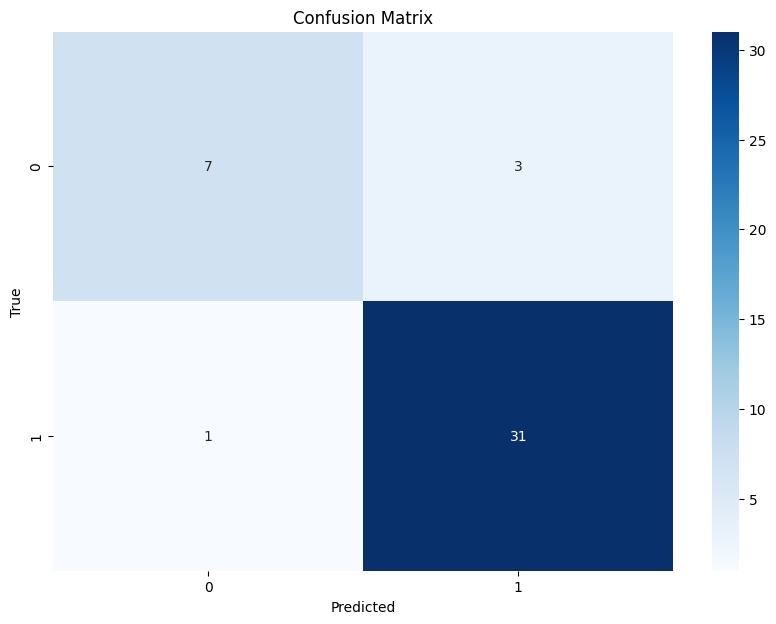

In [71]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## APLICACION DE MODELO DE CLASIFICACION DE NAIVE BAYES

In [76]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [77]:
y_pred = classifier.predict(X_test)

In [ ]:
conf_matrix_NB = confusion_matrix(y_test, y_pred)
class_report_NB = classification_report(y_test, y_pred)

array([[ 8,  2],
       [ 7, 25]], dtype=int64)

In [80]:
target_names = ['Primary', 'Secondary']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Primary       0.53      0.80      0.64        10
   Secondary       0.93      0.78      0.85        32

    accuracy                           0.79        42
   macro avg       0.73      0.79      0.74        42
weighted avg       0.83      0.79      0.80        42



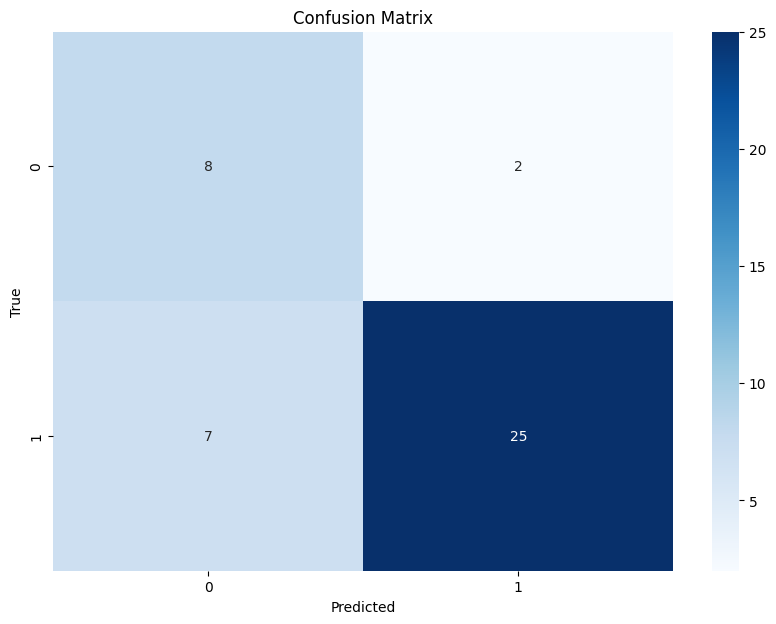

In [81]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_NB, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()